In [646]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [694]:
#Read in the csv file and convert to a Pandas dataframe
football = pd.read_csv("football_data.csv")
football

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.000000,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.000000,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.000000,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.000000,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.000000,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,/aidan-simmons/profil/spieler/867763,Western Sydney Wanderers,Aidan Simmons,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,0.263930,...,0.000000,0.000000,1023,0,0,0,75000,75000,4,1
10750,/kusini-yengi/profil/spieler/708099,Western Sydney Wanderers,Kusini Yengi,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,0.186335,...,0.000000,0.000000,1449,102,18,0,300000,300000,4,0
10751,/nathanael-blair/profil/spieler/1023268,Western Sydney Wanderers,Nathanael Blair,Attack Centre-Forward,181.240353,19.0,20,0.375000,0.000000,0.187500,...,0.000000,0.000000,960,0,0,0,50000,50000,4,0
10752,/zachary-sapsford/profil/spieler/703657,Western Sydney Wanderers,Zachary Sapsford,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,...,0.000000,0.000000,865,0,0,0,50000,50000,4,0


### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [648]:
football.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

In [649]:
football.describe(include="object")

,player,team,name,position
count,10754,10754,10754,10754
unique,10754,374,10584,16
top,/david-de-gea/profil/spieler/59377,Daejeon Hana Citizen,Paulinho,Defender Centre-Back
freq,1,46,6,1821


In [650]:
football.describe()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
mean,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,0.004666,0.006826,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,0.025232,0.081143,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,0.000000,0.000000,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,0.000000,0.000000,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,0.000000,0.000000,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000
max,206.000000,43.000000,107.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9.000000,90.000000,9510.000000,2349.000000,339.000000,92.000000,1.800000e+08,2.000000e+08,4.000000,1.000000


In [651]:
#player – معرف اللاعب الفريد (رابط URL). مثال: /david-de-gea/profil/spieler/59377
#team – النادي الذي يلعب فيه اللاعب. مثال: Manchester United
#name – اسم اللاعب بالكامل. مثال: Lionel Messi
#position – مركز اللاعب. مثال: Goalkeeper, Midfielder
#height – طول اللاعب بالسنتيمتر. 156 – 206 cm
#age – عمر اللاعب بالسنوات. 16 – 44
#appearance – عدد المباريات التي لعبها (كم مباراة لعب). 1 – 111
#goals – عدد الأهداف التي سجلها. 0 – 60+
#assists – عدد التمريرات الحاسمة (صناعة الأهداف). 0 – 20+
#yellow cards – عدد الكروت الصفراء التي حصل عليها. 0 – 15+
#second yellow cards – عدد الكروت الصفراء الثانية (إذا أخذ كرتين أصفر يصير كرت أحمر). 0 – 5+
#red cards – عدد الكروت الحمراء المباشرة. 0 – 3+
#goals conceded – عدد الأهداف التي استقبلها الحارس في المباراة (متوسط كم هدف يدخل مرمى الحارس كل مباراة). 0 – 3+ لكل مباراة
#clean sheets – عدد المباريات التي لم يستقبل فيها الحارس أهداف (مباريات لم يسجل فيها على الحارس أهداف). 0 – 30+
#minutes played – إجمالي عدد الدقائق التي لعبها. 10 – 10,000+
#days_injured – عدد الأيام التي غاب فيها اللاعب بسبب الإصابة. 0 – 700+
#games_injured – عدد المباريات التي غاب عنها بسبب الإصابة. 0 – 80+
#award – عدد الجوائز الفردية التي حصل عليها اللاعب (الجوائز الفردية). 0 – 50+
#current_value – قيمة اللاعب السوقية الحالية (€) (قيمته السوقية الحالية). €25K – €150M
#highest_value – أعلى قيمة سوقية وصل لها اللاعب (€) (أفضل قيمة سوقية وصل لها). €25K – €180M
#position_encoded – تمثيل مركز اللاعب بالأرقام (ترميز المراكز الأربعة):
#1 = Goalkeeper (حارس مرمى)
#2 = Defender (مدافع)
#3 = Midfielder (وسط)
#4 = Forward (مهاجم)
#winger – هل اللاعب جناح؟ (هل هو جناح أم لا؟)
#1 = Yes (نعم)
#0 = No (لا)

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [652]:
football.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [653]:
football.tail()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
10749,/aidan-simmons/profil/spieler/867763,Western Sydney Wanderers,Aidan Simmons,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,0.263930,...,0.0,0.0,1023,0,0,0,75000,75000,4,1
10750,/kusini-yengi/profil/spieler/708099,Western Sydney Wanderers,Kusini Yengi,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,0.186335,...,0.0,0.0,1449,102,18,0,300000,300000,4,0
10751,/nathanael-blair/profil/spieler/1023268,Western Sydney Wanderers,Nathanael Blair,Attack Centre-Forward,181.240353,19.0,20,0.375000,0.000000,0.187500,...,0.0,0.0,960,0,0,0,50000,50000,4,0
10752,/zachary-sapsford/profil/spieler/703657,Western Sydney Wanderers,Zachary Sapsford,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,...,0.0,0.0,865,0,0,0,50000,50000,4,0
10753,/alexander-badolato/profil/spieler/957230,Western Sydney Wanderers,Alexander Badolato,Attack Centre-Forward,170.000000,18.0,21,0.000000,0.000000,0.086042,...,0.0,0.0,1046,0,0,0,25000,25000,4,0


The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [654]:
#the data is from, i checked the data inside, i think it's good.

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [655]:
#we don't need to know about the time of the data.

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [656]:
# we only have one dataset, i think it's good for now.

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [657]:
football.drop(['name','player','team','height','position_encoded'],axis=1,inplace=True)

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [658]:
football[football.duplicated(keep=False)]

,position,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,winger
2630,Defender Left-Back,17.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1
2759,Goalkeeper,21.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,50000,50000,0
3175,Goalkeeper,24.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,100000,100000,0
3208,Goalkeeper,22.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,100000,100000,0
3209,Goalkeeper,22.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,100000,100000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10301,Goalkeeper,22.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,25000,25000,0
10413,Defender Centre-Back,19.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,25000,25000,0
10520,Defender Centre-Back,19.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,25000,25000,0
10650,Goalkeeper,19.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,25000,25000,0


#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [659]:
football.isnull().sum()

position               0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
winger                 0
dtype: int64

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [660]:
football.head()

,position,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,winger
0,Goalkeeper,32.0,104,0.000000,0.000000,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,15000000,70000000,0
1,Goalkeeper,30.0,15,0.000000,0.000000,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000,0
2,Goalkeeper,37.0,4,0.000000,0.000000,0.000000,0.0,0.0,0.616438,0.924658,292,697,84,4,600000,6000000,0
3,Defender Centre-Back,25.0,82,0.028090,0.056180,0.224719,0.0,0.0,0.000000,0.000000,6408,175,22,9,50000000,50000000,0
4,Defender Centre-Back,30.0,63,0.017889,0.017889,0.053667,0.0,0.0,0.000000,0.000000,5031,238,51,21,40000000,80000000,0


In [661]:
football.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   position             10754 non-null  object 
 1   age                  10754 non-null  float64
 2   appearance           10754 non-null  int64  
 3   goals                10754 non-null  float64
 4   assists              10754 non-null  float64
 5   yellow cards         10754 non-null  float64
 6   second yellow cards  10754 non-null  float64
 7   red cards            10754 non-null  float64
 8   goals conceded       10754 non-null  float64
 9   clean sheets         10754 non-null  float64
 10  minutes played       10754 non-null  int64  
 11  days_injured         10754 non-null  int64  
 12  games_injured        10754 non-null  int64  
 13  award                10754 non-null  int64  
 14  current_value        10754 non-null  int64  
 15  highest_value        10754 non-null 

**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [662]:
# go to delete ouliers

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


### Correcting errors

-------------------

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


# remove the outlier

In [663]:
football.shape

(10754, 17)

In [664]:
Q1 = football['current_value'].quantile(0.25)
Q3 = football['current_value'].quantile(0.75)
IQR = Q3 - Q1
football = football[(football['current_value'] >= Q1 - 1.5*IQR) & (football['current_value'] <= Q3 + 1.5*IQR)]

In [665]:
football.shape

(9494, 17)

In [666]:
Q1 = football["highest_value"].quantile(0.25)
Q3 = football["highest_value"].quantile(0.75)
IQR = Q3 - Q1
football = football[(football["highest_value"] >= Q1 - 1.5*IQR) & (football["highest_value"] <= Q3 + 1.5*IQR)]

In [667]:
football.shape

(8775, 17)

## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

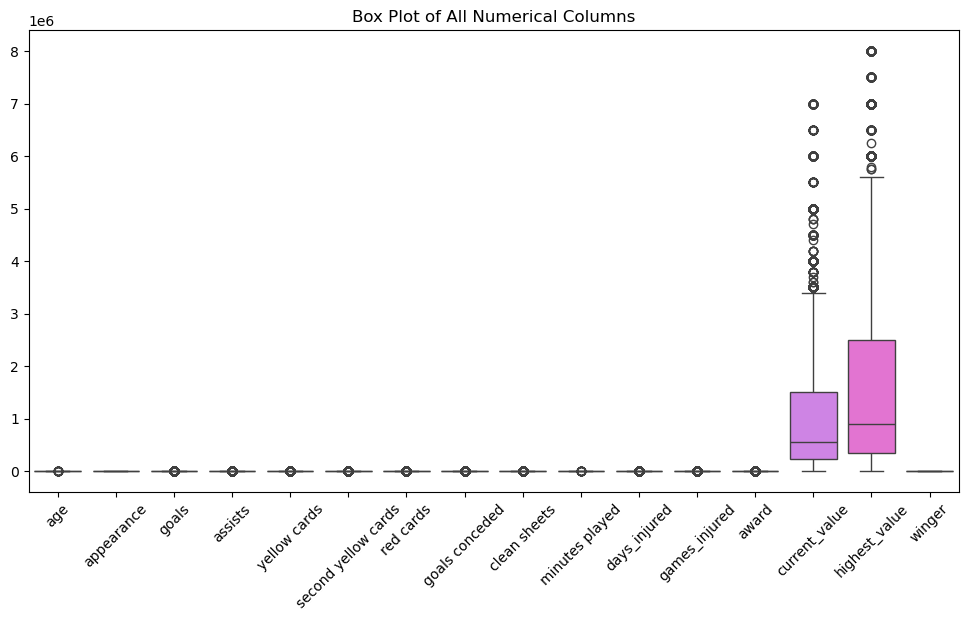

In [668]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=football)
plt.xticks(rotation=45)  # Rotate column names if needed
plt.title("Box Plot of All Numerical Columns")
plt.show()

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

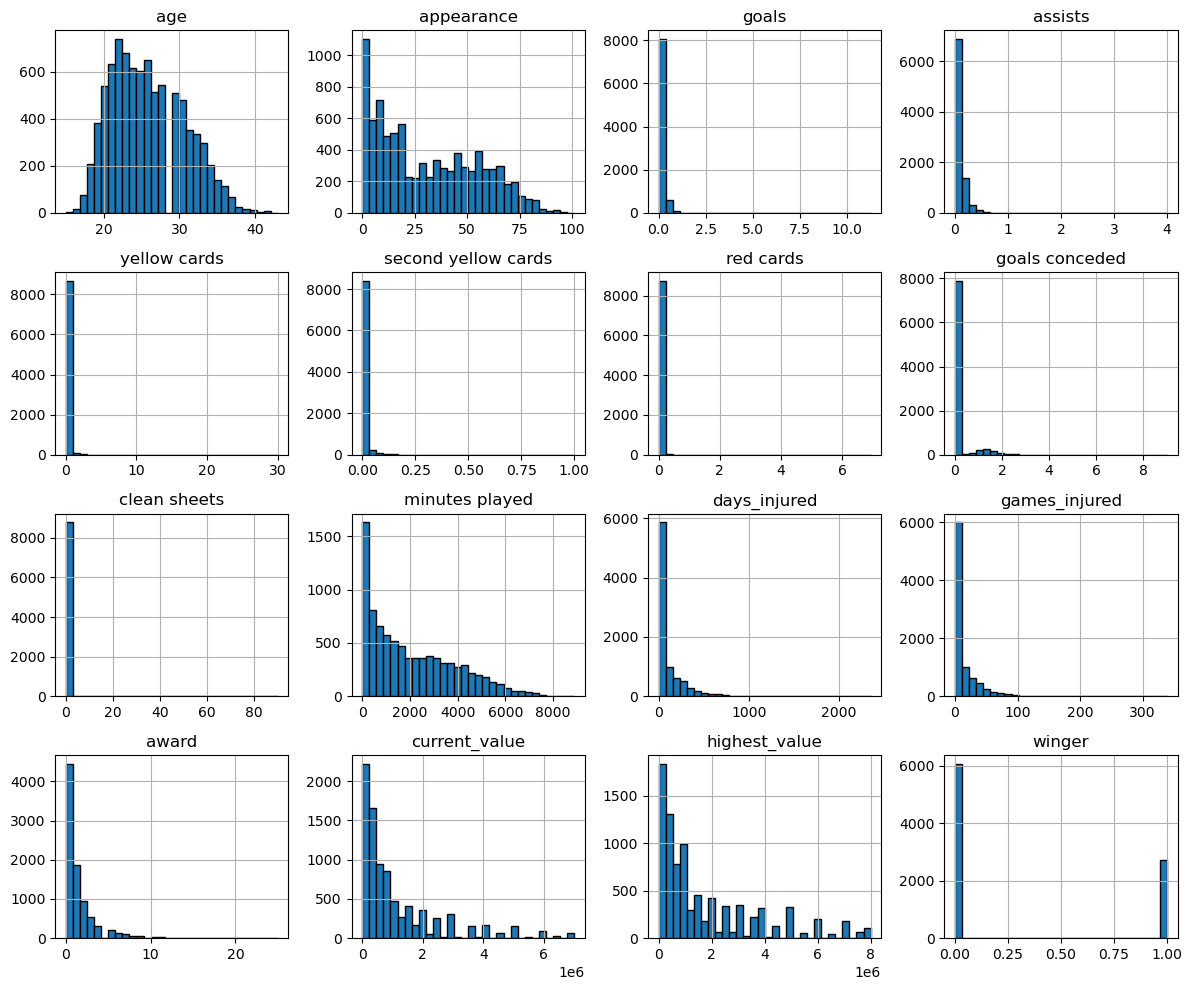

In [669]:
football.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

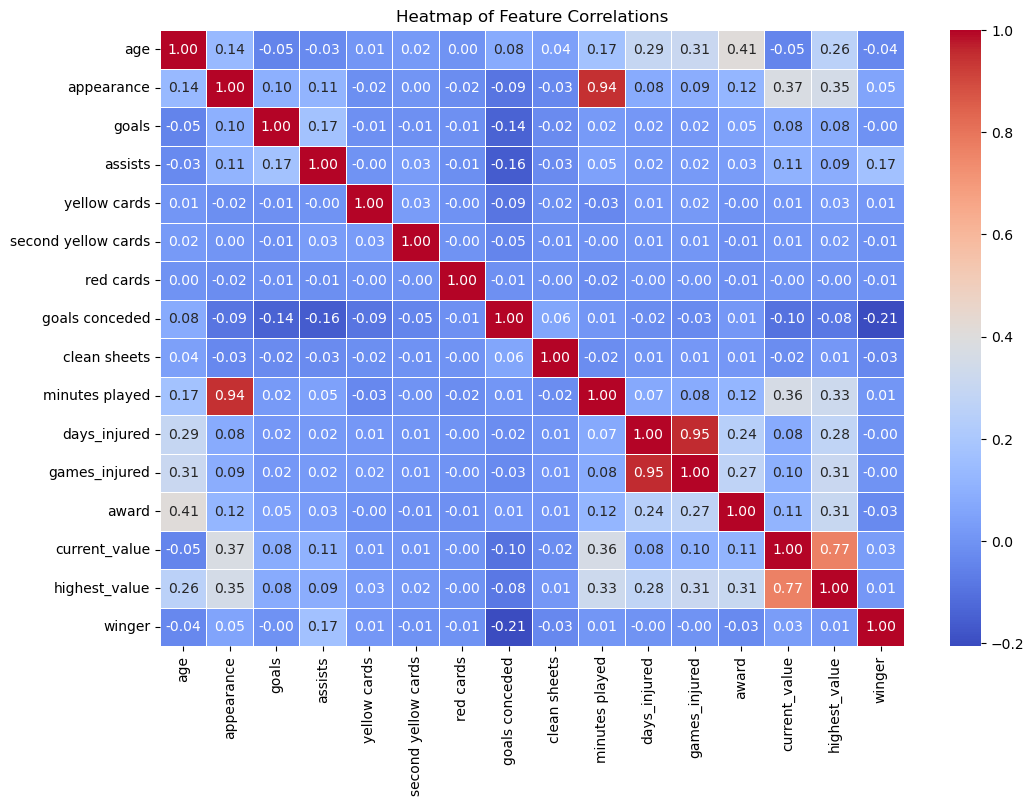

In [670]:
numeric_df = football.select_dtypes(include=['number'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap of Feature Correlations")
plt.show()

**Categorical & numerical --> (scatter plot, histogram, box plot)**

**numerical & numerical --> (Scatter plot, line chart)**

We could also use a correlation matrix to get more specific information about the relationship between these two variables.

# 2. Feature engineering

In [671]:
football.head()

,position,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,winger
2,Goalkeeper,37.0,4,0.000000,0.000000,0.000000,0.0,0.0,0.616438,0.924658,292,697,84,4,600000,6000000,0
8,Defender Centre-Back,21.0,34,0.000000,0.000000,0.130529,0.0,0.0,0.000000,0.000000,2758,47,13,0,2000000,2000000,0
20,midfield-CentralMidfield,20.0,39,0.129125,0.064562,0.225968,0.0,0.0,0.000000,0.000000,2788,0,0,1,800000,800000,0
21,midfield-CentralMidfield,18.0,51,0.153759,0.102506,0.000000,0.0,0.0,0.000000,0.000000,3512,0,0,1,800000,800000,0
28,Attack-RightWinger,21.0,34,0.000000,0.087379,0.262136,0.0,0.0,0.000000,0.000000,1030,90,15,1,3000000,7000000,1


In [672]:
football.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8775 entries, 2 to 10753
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   position             8775 non-null   object 
 1   age                  8775 non-null   float64
 2   appearance           8775 non-null   int64  
 3   goals                8775 non-null   float64
 4   assists              8775 non-null   float64
 5   yellow cards         8775 non-null   float64
 6   second yellow cards  8775 non-null   float64
 7   red cards            8775 non-null   float64
 8   goals conceded       8775 non-null   float64
 9   clean sheets         8775 non-null   float64
 10  minutes played       8775 non-null   int64  
 11  days_injured         8775 non-null   int64  
 12  games_injured        8775 non-null   int64  
 13  award                8775 non-null   int64  
 14  current_value        8775 non-null   int64  
 15  highest_value        8775 non-null   int64

In [673]:
#make the str to label
label_encoder = LabelEncoder()
football['position_encoded'] = label_encoder.fit_transform(football["position"])

In [674]:
football.columns

Index(['position', 'age', 'appearance', 'goals', 'assists', 'yellow cards',
       'second yellow cards', 'red cards', 'goals conceded', 'clean sheets',
       'minutes played', 'days_injured', 'games_injured', 'award',
       'current_value', 'highest_value', 'winger', 'position_encoded'],
      dtype='object')

In [675]:
#alt
#categorical_features = ['position']
#numeric_features = ['age', 'appearance', 'goals','assists','yellow cards','second yellow cards','red cards',
 #                   'goals conceded','clean sheets','minutes played','days_injured','games_injured','award',
  #                  'current_value','highest_value','winger']
#football = pd.get_dummies(football, columns=categorical_features)

In [676]:
football.shape

(8775, 18)

#### 3. Feature selection

In [ ]:
features = ['highest_value', 'appearance', 'minutes played', 'award', 'assists', 'goals','position_encoded']

In [677]:
#correlation = football.corr()
#print(correlation['current_value'].sort_values(ascending=False))

In [678]:
#print(correlation['current_value'].sort_values(ascending=False))

In [679]:
# Set the correlation threshold
threshold = 0.20  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
#selected_features = correlation[abs(correlation["current_value"]) > threshold]["current_value"].index

In [680]:
#selected_features

## split

In [681]:
X = football[features]
Y = football["current_value"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [682]:
X.shape

(8775, 7)

## Scaler

In [683]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model LR


In [684]:
model = LinearRegression()

In [685]:
model.fit(X_train_scaled, Y_train)

LinearRegression()

In [686]:
Y_pred = model.predict(X_test_scaled)  

In [687]:
predictions = model.predict(X_test_scaled)

In [688]:
predictions

array([1078301.48602894,   51541.04072757,  636552.33885424, ...,
        624878.83961018, 4040041.78321015, 2275424.21671229])

In [689]:
print("RMSE:", mean_squared_error(Y_test, Y_pred, squared=False))
print("MAE:", mean_absolute_error(Y_test, Y_pred))
print("R²:", r2_score(Y_test, Y_pred))

RMSE: 853139.1028022608
MAE: 518460.929475194
R²: 0.6232236257245634


In [690]:
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
})
print(coefficients.sort_values(by='Coefficient', ascending=False))

            Feature   Coefficient
0     highest_value  1.074682e+06
2    minutes played  2.034122e+05
4           assists  4.839281e+04
5             goals  2.938053e+04
6  position_encoded  8.674588e+03
1        appearance -3.242554e+04
3             award -1.987876e+05


In [691]:
Real_Values = np.array(Y_test)

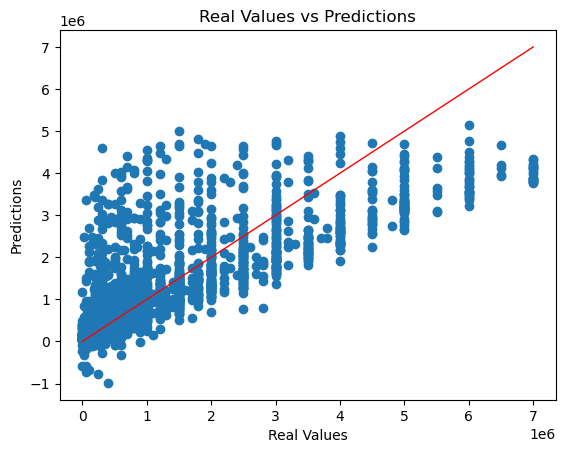

In [692]:
plt.scatter(Real_Values, predictions)
plt.plot([Real_Values.min(), Real_Values.max()], [Real_Values.min(), Real_Values.max()], color='red', lw=1)
plt.xlabel('Real Values')
plt.ylabel('Predictions')
plt.title('Real Values vs Predictions')
plt.show()

In [697]:

# Drop unnecessary columns
df = football.drop(columns=["player", "name", "highest_value"])  # Removing ID-like and redundant columns

# Encode categorical variables
label_encoders = {}
for col in ["team", "position"]:  # Encoding categorical columns
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features (X) and target variable (y)
X = df.drop(columns=["current_value"])
y = df["current_value"]

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (important for some models like Linear Regression, Gradient Boosting)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train multiple models
models = {
    "Linear Regression": LinearRegression(),

}

results = {}
for name, model in models.items():
    if name == "Linear Regression":
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    # Evaluate performance
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    
    results[name] = {"R² Score": r2, "RMSE": rmse, "MAE": mae}